In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


In [2]:
url='https://drive.google.com/uc?id=1V61Pj62FSsmofMpomI9N0d2scqjO4P90'

df = pd.read_csv(url, encoding="ISO-8859-1", sep=";", date_parser=["dt_carga"])
df.head()

,ds_cargo,cd_municipio,nm_municipio,nm_regiao,nr_turno,sg_uf,nr_zona,nm_candidato,nr_candidato,sg_partido,ds_sit_totalizacao,qt_votos_nominais,qt_votos_validos,dt_carga
0,Presidente,19,GUAJARÁ-MIRIM,NORTE,2,RO,1,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,13001,19839,2022-11-04 15:55:26
1,Presidente,19,GUAJARÁ-MIRIM,NORTE,2,RO,1,LUIZ INÁCIO LULA DA SILVA,13,PT,Eleito,6838,19839,2022-11-04 15:55:26
2,Presidente,35,PORTO VELHO,NORTE,2,RO,2,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,52020,79968,2022-11-04 15:55:26
3,Presidente,35,PORTO VELHO,NORTE,2,RO,2,LUIZ INÁCIO LULA DA SILVA,13,PT,Eleito,27948,79968,2022-11-04 15:55:26
4,Presidente,35,PORTO VELHO,NORTE,2,RO,6,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,43333,64723,2022-11-04 15:55:26


In [109]:
len(df["sg_uf"])

12566

# Relevancia de cada estado na eleição


In [ ]:
total_votos = df["qt_votos_nominais"].sum()

votos_estados = ((df.groupby("sg_uf"))["qt_votos_nominais"].sum()).sort_values(ascending=False)
votos_estados = votos_estados.to_frame()
votos_estados.columns = ["Votos"]
votos_estados["Relevancia"] = round((votos_estados/total_votos)*100, 2)
votos_estados

In [ ]:
votos_estados[4::]

In [101]:
top3_relevancia = votos_estados[:4]
top3_relevancia.loc["Outros"] = votos_estados[4::].sum()
top3_relevancia

<ipython-input-101-3b8dcf2da1a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_relevancia.loc["Outros"] = votos_estados[4::].sum()


,Votos,Relevancia
sg_uf,,
SP,25736469.0,21.71
MG,12332270.0,10.40
RJ,9560111.0,8.06
BA,8454843.0,7.13
Outros,62468660.0,52.69


118552353.0

Text(0.5, 1.0, 'Relevancia de cada estado na eleição')

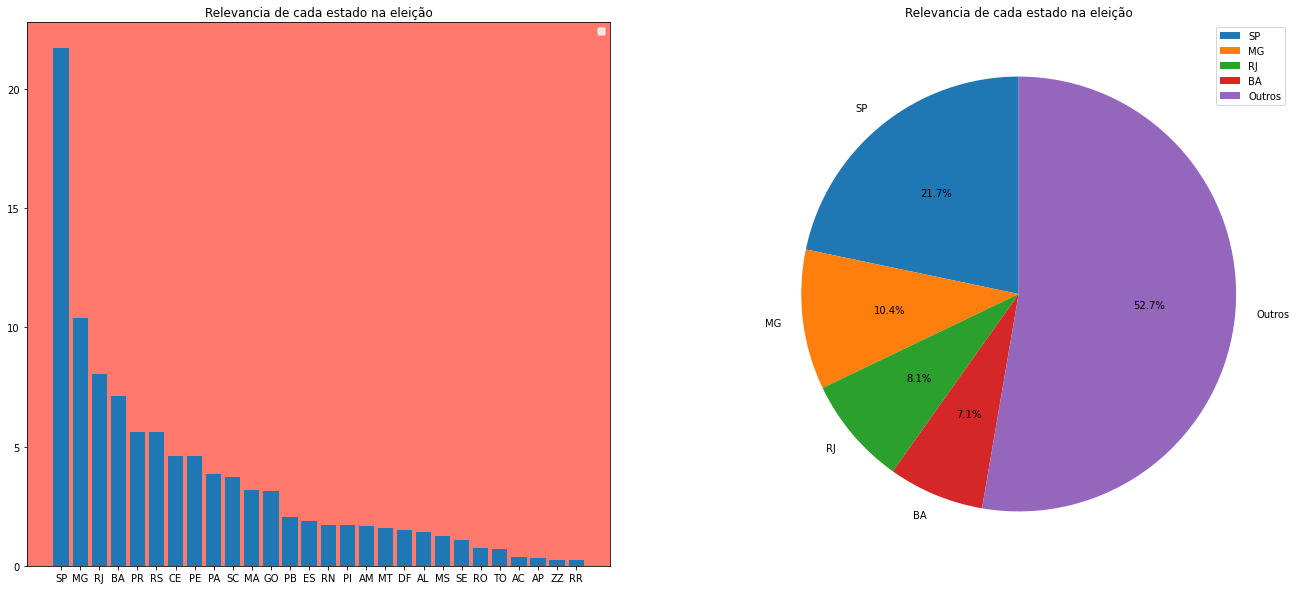

In [117]:
fig1, ax1 = plt.subplots(figsize=(23, 10), ncols=2)

ax1[0].bar(x=votos_estados.index, height=votos_estados["Relevancia"])
ax1[0].set_facecolor('xkcd:salmon')
# ax1.axis('equal')
ax1[0].legend()
ax1[0].set_title("Relevancia de cada estado na eleição")

ax1[1].pie(top3_relevancia["Relevancia"], labels=top3_relevancia.index, autopct='%1.1f%%', 
        startangle=90)
ax1[1].set_facecolor('xkcd:salmon')
# ax1.axis('equal')
ax1[1].legend()
ax1[1].set_title("Relevancia de cada estado na eleição")


# Não AGRUPADO POR CORDENADA

In [6]:
df[df["qt_votos_validos"] == df["qt_votos_validos"].max()]

,ds_cargo,cd_municipio,nm_municipio,nm_regiao,nr_turno,sg_uf,nr_zona,nm_candidato,nr_candidato,sg_partido,ds_sit_totalizacao,qt_votos_nominais,qt_votos_validos,dt_carga
8498,Presidente,71072,SÃO PAULO,SUDESTE,2,SP,372,JAIR MESSIAS BOLSONARO,22,PL,Não Eleito,70698,211515,2022-11-04 15:55:26
8499,Presidente,71072,SÃO PAULO,SUDESTE,2,SP,372,LUIZ INÁCIO LULA DA SILVA,13,PT,Eleito,140817,211515,2022-11-04 15:55:26


In [ ]:
sum(df["qt_votos_validos"])/2

118552353.0

In [ ]:
sum(df["qt_votos_nominais"]["JAIR MESSIAS BOLSONARO" == df["nm_candidato"]])

58206354

In [ ]:
sum(df["qt_votos_nominais"]["LUIZ INÁCIO LULA DA SILVA" == df["nm_candidato"]])

60345999

In [ ]:
df[df["nm_municipio"] == "SÃO PAULO"]

In [ ]:
df[df["sg_uf"] == "SP"]

In [ ]:
voto_zero = df[df["qt_votos_nominais"] == 0]["cd_municipio"].unique()

In [ ]:
 tabela_zero = df[df["cd_municipio"].isin(voto_zero)]
 tabela_zero[tabela_zero["qt_votos_nominais"] > 0]


In [ ]:
df[df["cd_municipio"] == 0]

In [8]:
lula = df[df["nr_candidato"] == 13].sort_values(by=['dt_carga'])
bolsonaro = df[df["nr_candidato"] == 22].sort_values(by=['dt_carga'])

In [29]:
bolsonaro_votos = (bolsonaro.groupby("sg_uf"))["qt_votos_nominais"].sum()


In [30]:
lula_votos = (lula.groupby("sg_uf"))["qt_votos_nominais"].sum()


In [ ]:
lula[["qt_votos_nominais", 'nr_zona']].values

In [ ]:
bolsonaro_votos
lula_votos

In [ ]:
caditado_maior_votos_per_region = pd.DataFrame(columns=["Votos", "Canditado"])

for region in bolsonaro_votos.index:
  if bolsonaro_votos[bolsonaro_votos.index == region].values > lula_votos[lula_votos.index == region].values:
    caditado_maior_votos_per_region = caditado_maior_votos_per_region.append(
        {"Votos": bolsonaro_votos[bolsonaro_votos.index == region].values[0], 
         "Canditado": "blue"}
        , ignore_index=True)
  else:
    caditado_maior_votos_per_region = caditado_maior_votos_per_region.append(
        {"Votos": lula_votos[lula_votos.index == region].values[0], 
         "Canditado": "red"}, 
         ignore_index=True)
    
caditado_maior_votos_per_region.index = lula_votos.index
caditado_maior_votos_per_region

In [44]:
caditado_maior_votos_per_region = caditado_maior_votos_per_region.sort_values("Votos", ascending=False)
caditado_maior_votos_per_region.sum()

Votos                                                 71337043
Canditado    blueredredblueblueredblueredblueredredblueredr...
dtype: object

In [ ]:


fig, ax = plt.subplots(dpi=100, figsize=(20,20))
ax.scatter(x=lula_votos.index, y=lula_votos.values/10, s=65, label="LULA", alpha=0.8, color="red")
ax.scatter(x=bolsonaro_votos.index, y=bolsonaro_votos.values/10, s=65, label="BOLSO", alpha=0.8, color="blue")
ax.set_xticks([0,100,1000])
ax.set_xticklabels(lula_votos.index[:3])
# # ax.set_yticks([0,100,1000, 10000])
# ax.set_yticklabels([0,100,1000, 10000])

# ax.set_xlim(0, len(bolsonaro_votos.index))
# ax.set_ylim(0, 10000)

In [ ]:
caditado_maior_votos_per_region[caditado_maior_votos_per_region["Votos"] == caditado_maior_votos_per_region["Votos"].max()]

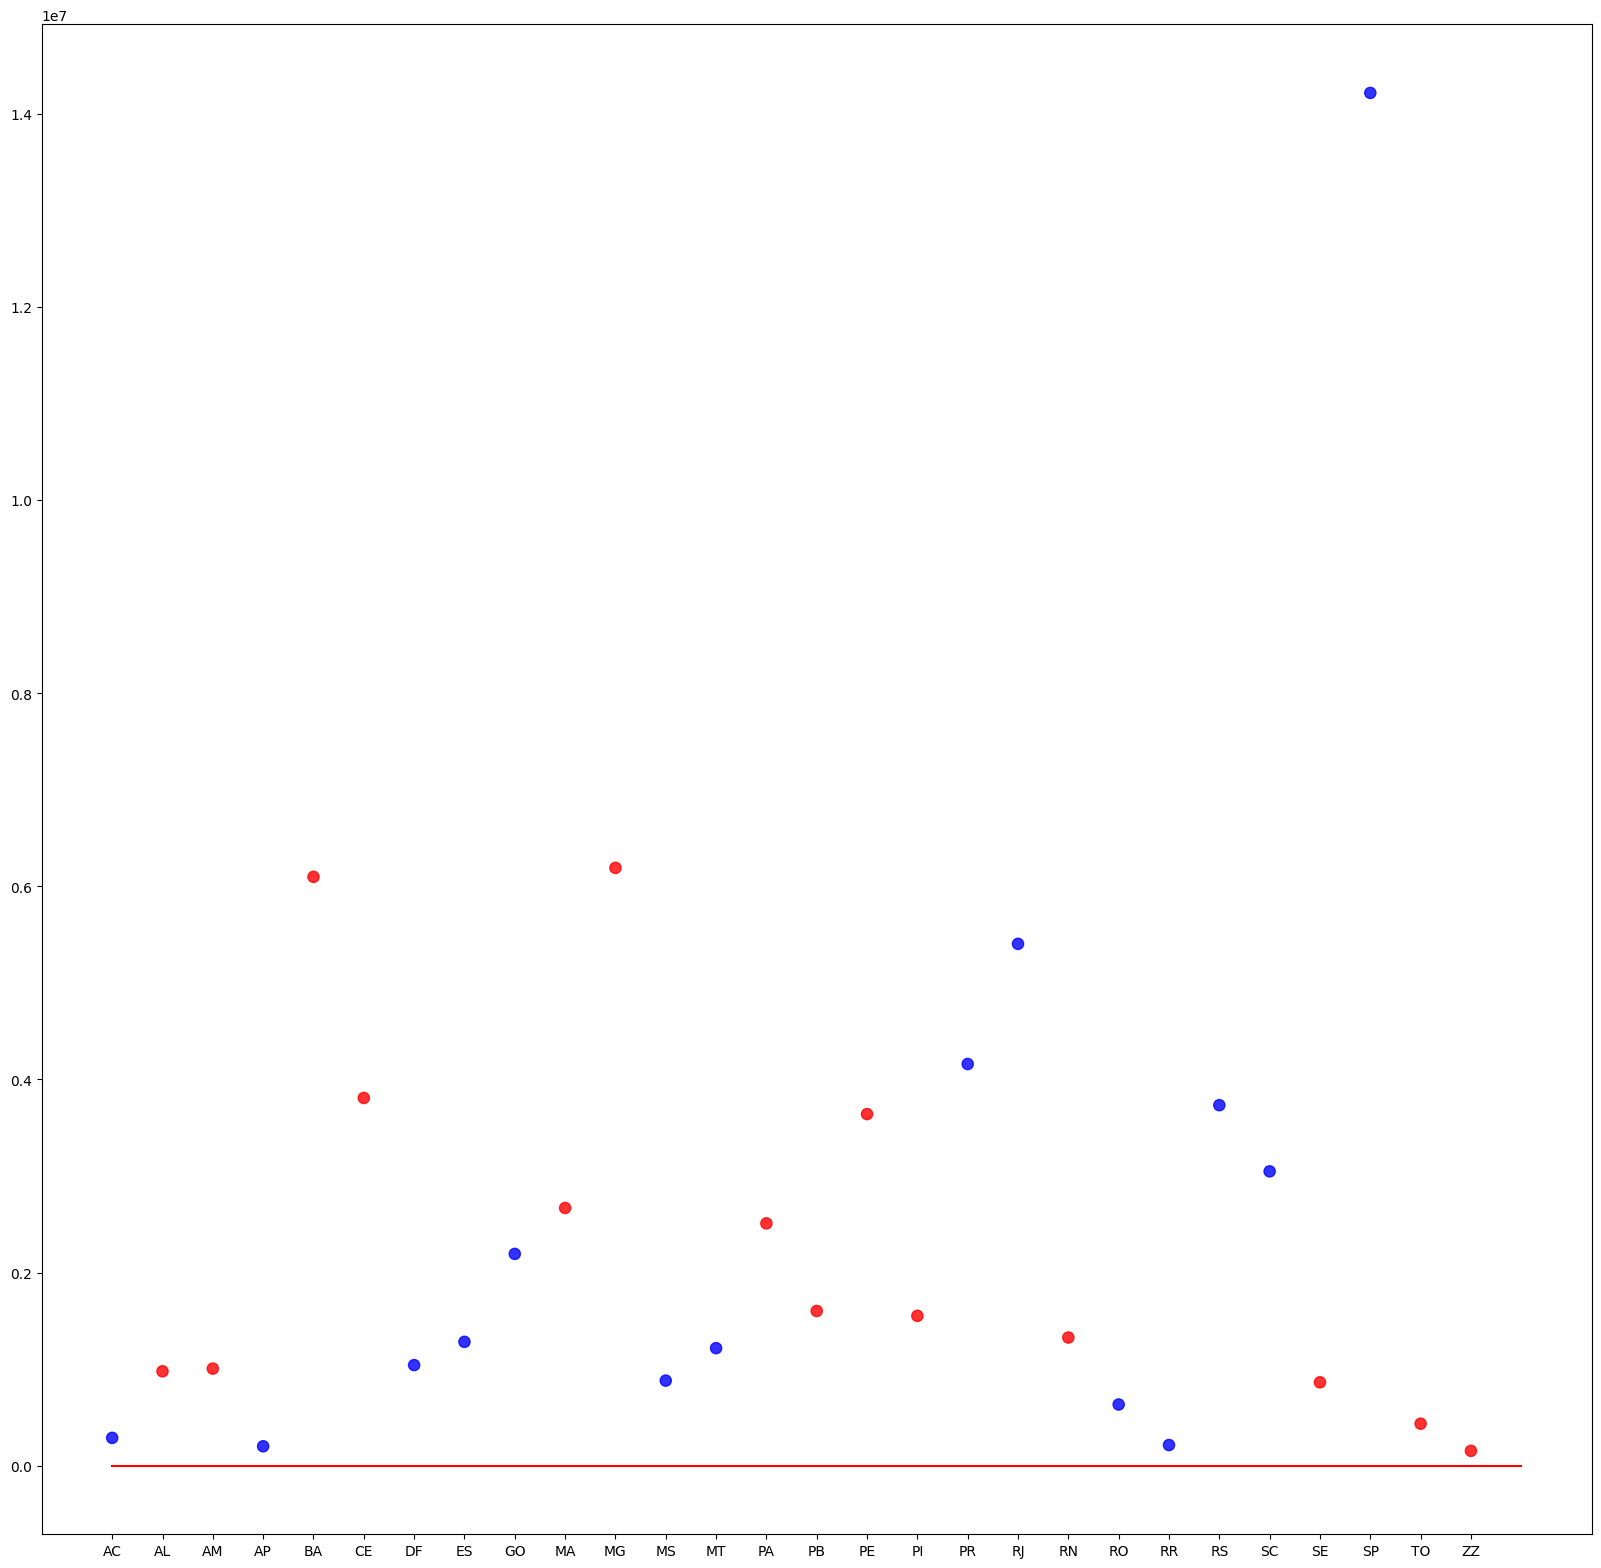

In [39]:
fig, ax = plt.subplots(dpi=100, figsize=(20,20))
ax.scatter(x=caditado_maior_votos_per_region.index, y=caditado_maior_votos_per_region["Votos"].values, 
           s=65, label="LULA", alpha=0.8, color=caditado_maior_votos_per_region['Canditado'])

plt.plot((0, len(caditado_maior_votos_per_region.index)), (8, 8), color="Red", label="Linha TOP 8")

# ax.set_xticks([0,100,1000])
# ax.set_xticklabels(lula_votos.index[:3])
# ax.set_yticks([0,100,1000, 10000])
# ax.set_yticklabels([0,100,1000, 10000])

# ax.set_xlim(-100, len(bolsonaro_votos.index) + 100)
# ax.set_ylim(-100, 1000000)
# ax.set_xscale("log")
# ax.set_yscale("log")

In [ ]:
v = bolsonaro_votos.max()
bolsonaro_votos[bolsonaro_votos.values == v]

nm_municipio
SÃO PAULO    3191484
Name: qt_votos_nominais, dtype: int64

In [ ]:
bolsonaro_votos.sort_values(ascending=False)[:10]

nm_municipio
SÃO PAULO         3191484
RIO DE JANEIRO    1929209
BRASÍLIA          1041331
BELO HORIZONTE     834548
CURITIBA           720322
MANAUS             692580
FORTALEZA          633009
GOIÂNIA            513018
SALVADOR           451131
RECIFE             433317
Name: qt_votos_nominais, dtype: int64

In [ ]:
lula_votos.sort_values(ascending=False)[:10]

nm_municipio
SÃO PAULO         3677921
RIO DE JANEIRO    1734159
SALVADOR          1089899
FORTALEZA          880559
BRASÍLIA           729295
BELO HORIZONTE     703755
RECIFE             558690
BELÉM              441271
PORTO ALEGRE       437798
MANAUS             437691
Name: qt_votos_nominais, dtype: int64

In [ ]:
votos_atuais = 0
votos = []
for n_voto in lula_votos:
  votos_atuais = votos_atuais + n_voto
  votos.append(votos_atuais)
  
votos_processo_votos_lula = pd.DataFrame(votos, index=lula_votos.index)
votos_processo_votos_lula

,0
nm_municipio,
ABADIA DE GOIÁS,3814
ABADIA DOS DOURADOS,6165
ABADIÂNIA,8939
ABAETETUBA,81252
ABAETÉ,87554
...,...
ÁUREA,60319808
ÂNGULO,60320537
ÉRICO CARDOSO,60325452


In [ ]:
bolsonaro_votos

nm_municipio
ABADIA DE GOIÁS         5394
ABADIA DOS DOURADOS     2160
ABADIÂNIA               5759
ABAETETUBA             25118
ABAETÉ                  7696
                       ...  
ÁUREA                   1634
ÂNGULO                  1437
ÉRICO CARDOSO           1175
ÓBIDOS                  8577
ÓLEO                    1163
Name: qt_votos_nominais, Length: 5466, dtype: int64

In [ ]:
votos_atuais = 0
votos = []
for n_voto in bolsonaro_votos:
  votos_atuais = votos_atuais + n_voto
  votos.append(votos_atuais)
  
votos_processo_votos_bolsonaro = pd.DataFrame(votos, index=bolsonaro_votos.index)
votos_processo_votos_bolsonaro

,0
nm_municipio,
ABADIA DE GOIÁS,5394
ABADIA DOS DOURADOS,7554
ABADIÂNIA,13313
ABAETETUBA,38431
ABAETÉ,46127
...,...
ÁUREA,58194002
ÂNGULO,58195439
ÉRICO CARDOSO,58196614


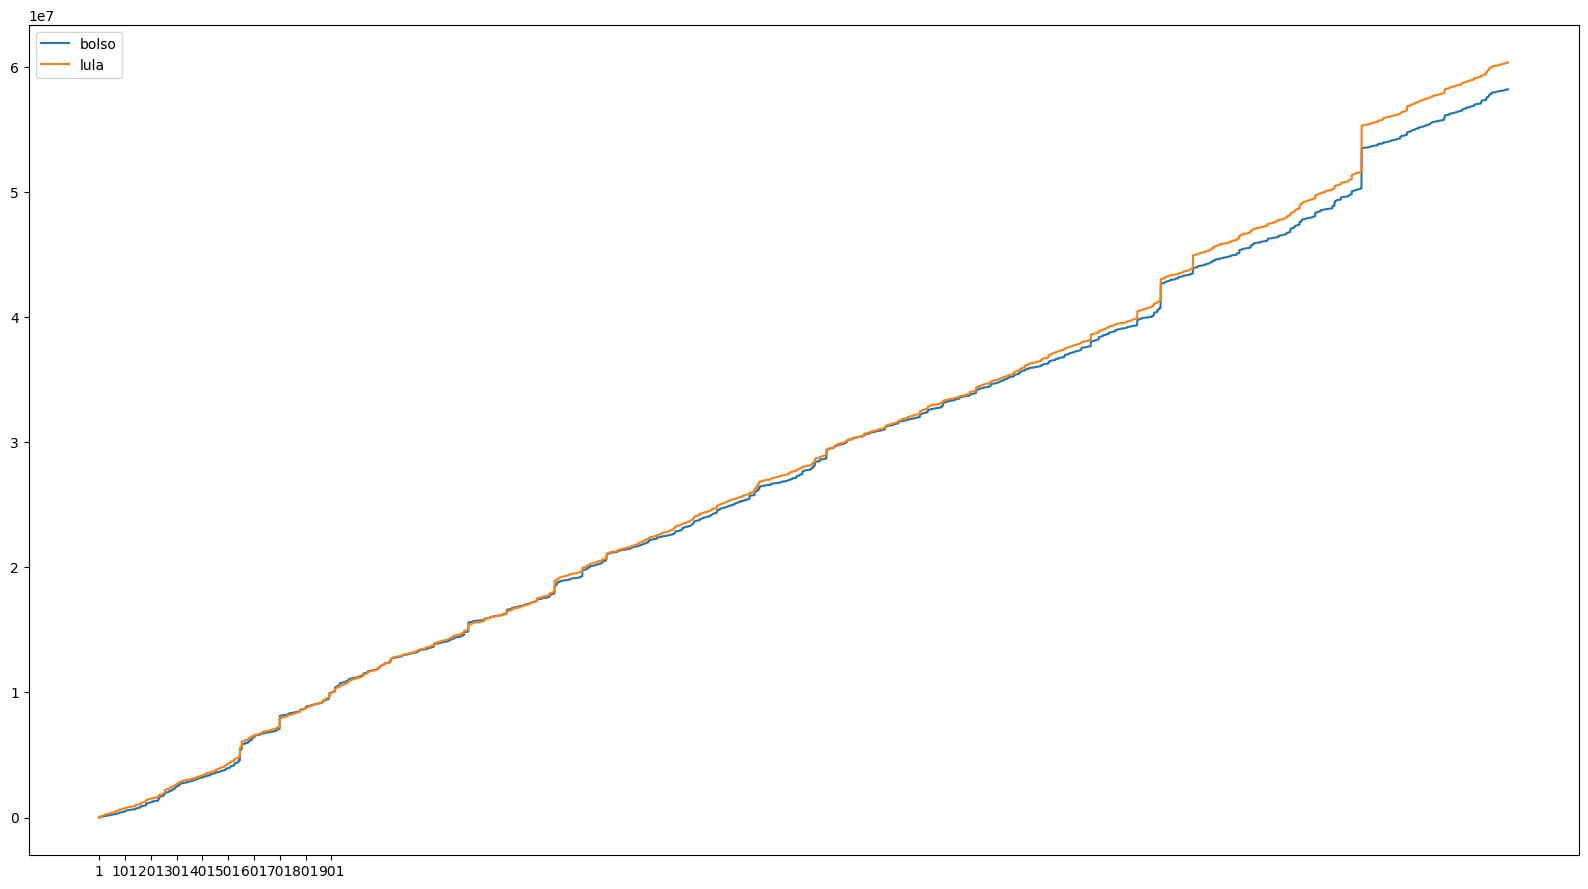

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(20,11))
ax.plot(votos_processo_votos_bolsonaro, label="bolso")
ax.plot(votos_processo_votos_lula, label="lula")

ax.set_xticks([x for x in range(1, 1000, 100)])
ax.set_xticklabels([x for x in range(1, 1001, 100)])
ax.legend()

In [ ]:
votos_processo_votos_bolsonaro["Lula"] = votos_processo_votos_lula.values

In [ ]:
total_votos = votos_processo_votos_bolsonaro.rename(columns={0: "Bolsonaro"})
total_votos["total votos"] = total_votos["Bolsonaro"] + total_votos["Lula"]
total_votos["% Lula"] = round((total_votos["Lula"]/total_votos["total votos"]) * 100, 2)
total_votos["% Bolsonaro"] = round((total_votos["Bolsonaro"]/total_votos["total votos"]) * 100, 2)
total_votos

,Bolsonaro,Lula,total votos,% Lula,% Bolsonaro
nm_municipio,,,,,
ABADIA DE GOIÁS,5394,3814,9208,41.42,58.58
ABADIA DOS DOURADOS,7554,6165,13719,44.94,55.06
ABADIÂNIA,13313,8939,22252,40.17,59.83
ABAETETUBA,38431,81252,119683,67.89,32.11
ABAETÉ,46127,87554,133681,65.49,34.51
...,...,...,...,...,...
ÁUREA,58194002,60319808,118513810,50.90,49.10
ÂNGULO,58195439,60320537,118515976,50.90,49.10
ÉRICO CARDOSO,58196614,60325452,118522066,50.90,49.10


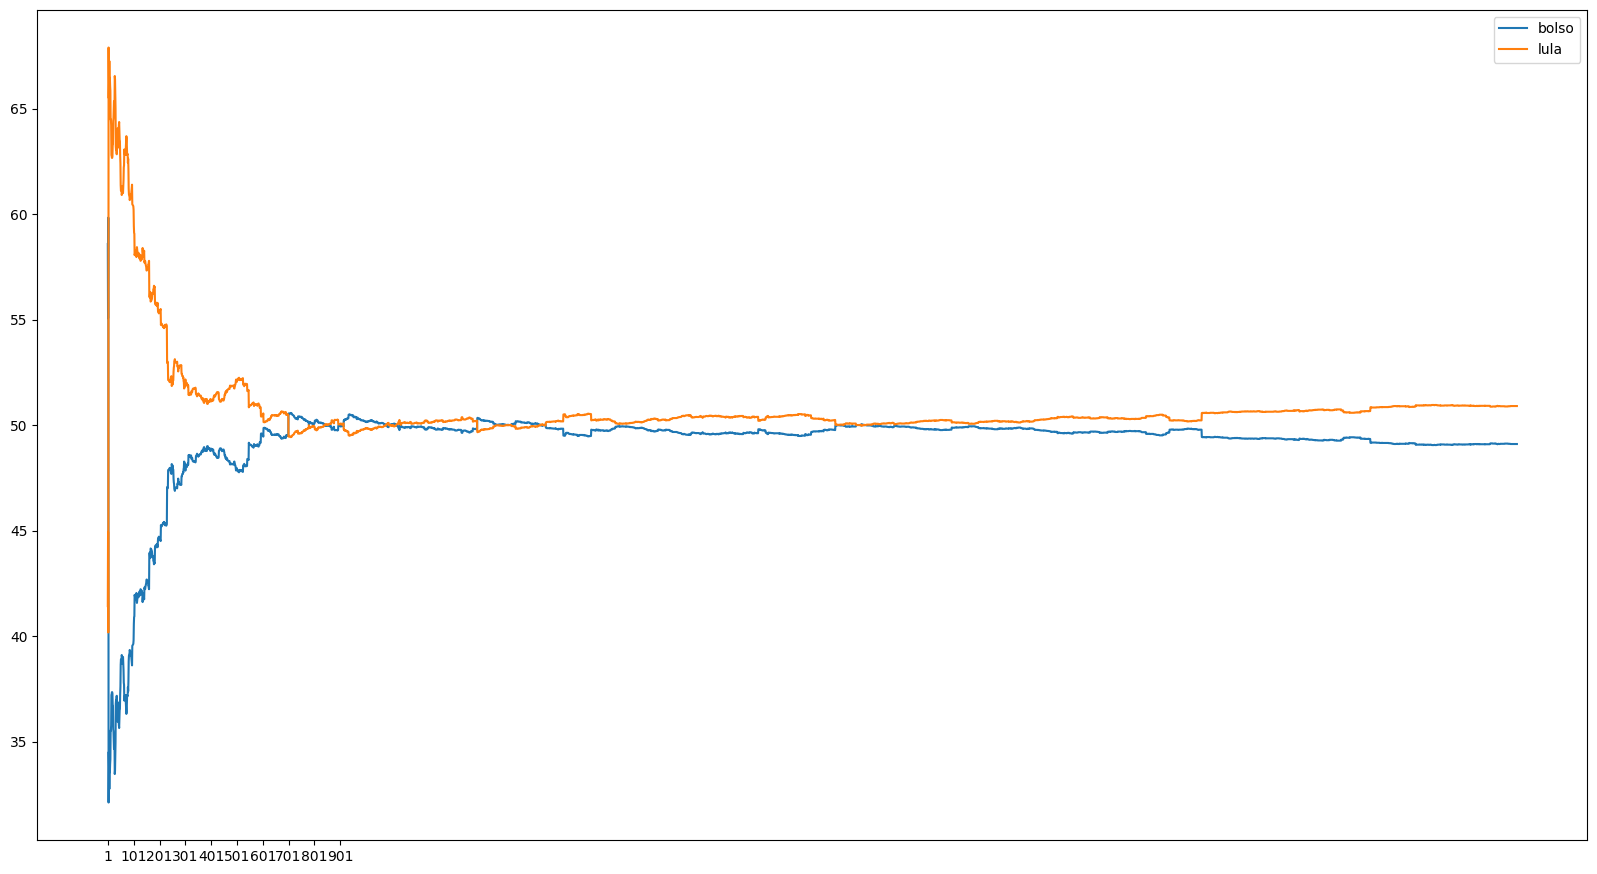

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(20,11))
ax.plot(total_votos.index, total_votos["% Bolsonaro"], label="bolso")
ax.plot(total_votos.index, total_votos["% Lula"], label="lula")

ax.set_xticks([x for x in range(1, 1000, 100)])
ax.set_xticklabels([x for x in range(1, 1001, 100)])
ax.legend()

In [ ]:
numero = 20
print(f"{numero}")


20


# Pizza Grafico


In [ ]:
lula = df[df["nr_candidato"] == 13].sort_values(by=['dt_carga'])
bolsonaro = df[df["nr_candidato"] == 22].sort_values(by=['dt_carga'])

lula_votos = (lula.groupby("nm_regiao"))["qt_votos_nominais"].sum()
bolsonaro_votos = (bolsonaro.groupby("nm_regiao"))["qt_votos_nominais"].sum()

In [ ]:
lula_votos["Total"] = lula_votos.sum()
df_lulu = pd.DataFrame(lula_votos)
df_lulu["%"] = ((df_lulu["qt_votos_nominais"].values / df_lulu.loc["Total"].values) * 100).round(2)
df_lulu = df_lulu.drop("Total")
df_lulu

,qt_votos_nominais,%
nm_regiao,,
CENTRO-OESTE,3523743,5.84
EXTERIOR,152905,0.25
NORDESTE,22534967,37.34
NORTE,4590184,7.61
SUDESTE,22793826,37.77
SUL,6750374,11.19


Text(0.5, 1.0, 'Lula Votos Por Região')

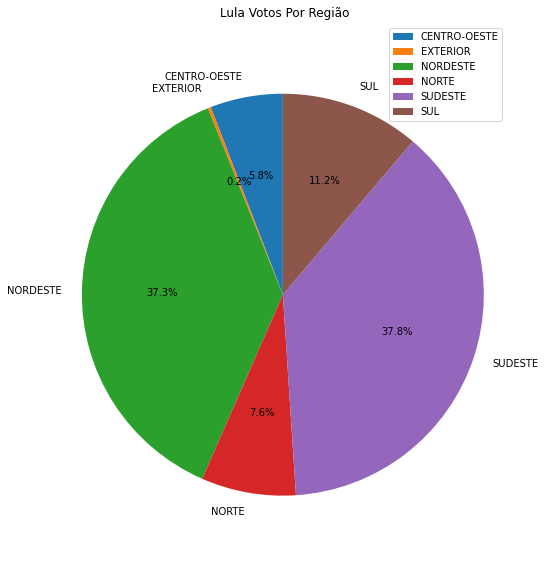

In [ ]:

fig1, ax1 = plt.subplots(figsize=(8, 10))
ax1.pie(df_lulu["%"], labels=df_lulu.index, autopct='%1.1f%%', 
        startangle=90)
ax1.axis('equal')
ax1.legend()
ax1.set_title("Lula Votos Por Região")

In [ ]:
bolsonaro_votos["Total"] = bolsonaro_votos.sum()
df_bolsonaro = pd.DataFrame(bolsonaro_votos)
df_bolsonaro["%"] = ((df_bolsonaro["qt_votos_nominais"].values / df_bolsonaro.loc["Total"].values) * 100).round(2)
df_bolsonaro = df_bolsonaro.drop("Total")
df_bolsonaro

,qt_votos_nominais,%
nm_regiao,,
CENTRO-OESTE,5331708,9.16
EXTERIOR,145264,0.25
NORDESTE,9962947,17.12
NORTE,4782341,8.22
SUDESTE,27043936,46.46
SUL,10940158,18.80


Text(0.5, 1.0, 'Bolsonaro Votos Por Região')

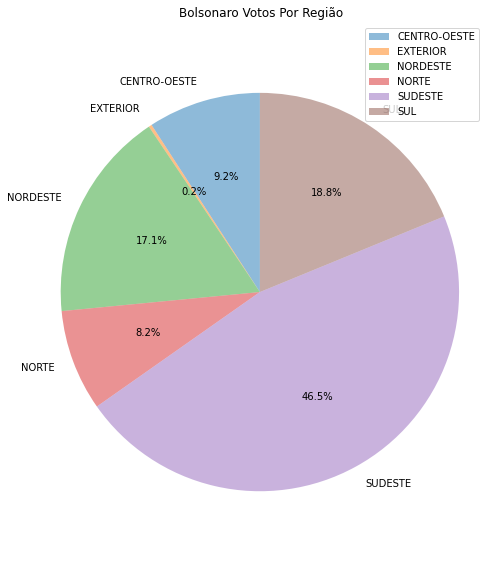

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8, 10))

ax1.pie(df_bolsonaro["%"], labels=df_bolsonaro.index, autopct='%1.1f%%', startangle=90, wedgeprops={'alpha':0.5})
ax1.set_facecolor('xkcd:salmon')
ax1.axis('equal')
ax1.legend()
ax1.set_title("Bolsonaro Votos Por Região")

Text(0.5, 1.0, 'Bolsonaro Votos Por Região')

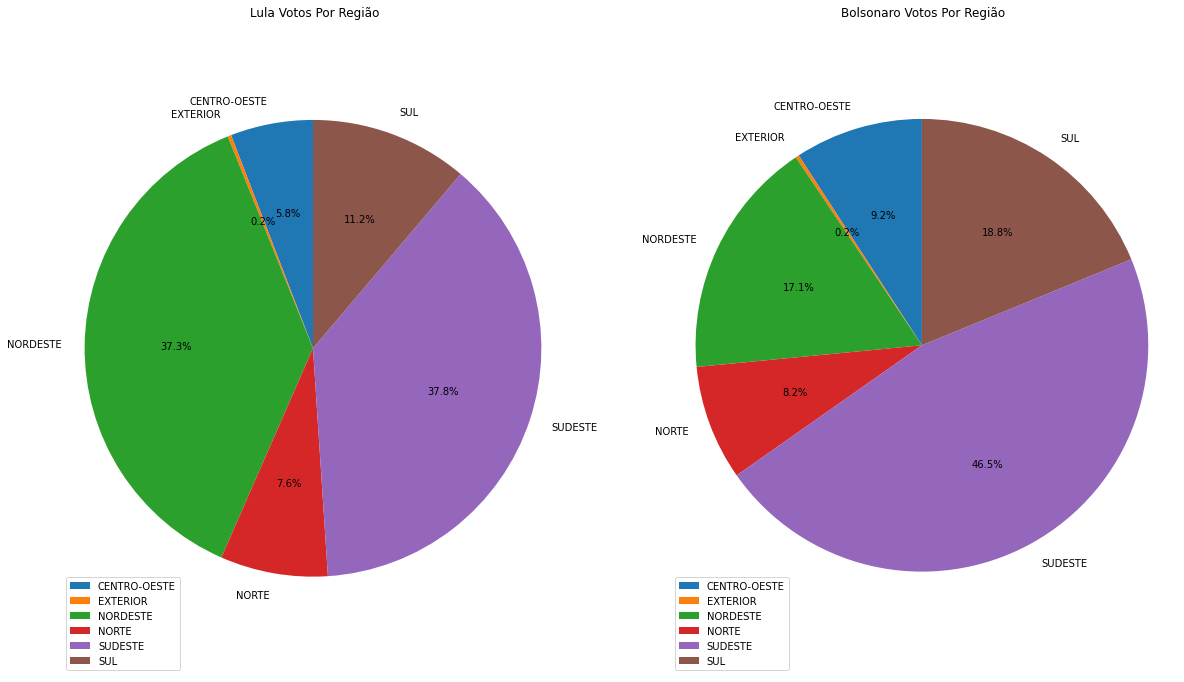

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 12), ncols=2)

ax1[0].pie(df_lulu["%"], labels=df_lulu.index, autopct='%1.1f%%', 
        startangle=90)
ax1[0].axis('equal') 
ax1[0].legend(loc=3)

ax1[0].set_title("Lula Votos Por Região")


ax1[1].pie(df_bolsonaro["%"], labels=df_bolsonaro.index, autopct='%1.1f%%', startangle=90)
ax1[1].axis('equal')  
ax1[1].legend(loc=3)
ax1[1].set_title("Bolsonaro Votos Por Região")

